In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install gdown


In [ ]:
import gdown

# Link chia sẻ của Google Drive (chỉ cần ID file)
file_id = '1pOgxuBXaI6D9pXLjbEWZAT4Gc0QvhKgW'

# Tải file về
gdown.download(f'https://drive.google.com/drive/folders/1pOgxuBXaI6D9pXLjbEWZAT4Gc0QvhKgW?usp=drive_link', 'path_to_save_file', quiet=False)


/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/folders/1pOgxuBXaI6D9pXLjbEWZAT4Gc0QvhKgW?usp=drive_link
To: /content/path_to_save_file
1.24MB [00:00, 94.2MB/s]


'path_to_save_file'

In [ ]:
!pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

image_folder = '/content/drive/MyDrive/cropped_images_benchmark'  # Thay đổi đường dẫn theo thư mục của bạn

In [ ]:
import torch
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import os
import numpy as np

In [ ]:
!unzip /content/drive/MyDrive/cropped_images_train-20250610T093839Z-1-001.zip -d /content/


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/cropped_images_train/bike/camera4_M_127_png.rf.930b4ecb7112d1611e5ce387236d1ed7_527_431.jpg  
  inflating: /content/cropped_images_train/bike/camera1_A_259_png.rf.82b7dd25ee28a39aea2284cd04fba895_495_147.jpg  
  inflating: /content/cropped_images_train/bike/camera1_A_336_png.rf.28878db9d7ffa160f6521658ae5ddd38_327_82.jpg  
  inflating: /content/cropped_images_train/bike/camera4_M_127_png.rf.930b4ecb7112d1611e5ce387236d1ed7_497_173.jpg  
  inflating: /content/cropped_images_train/bike/camera1_A_336_png.rf.28878db9d7ffa160f6521658ae5ddd38_432_120.jpg  
  inflating: /content/cropped_images_train/bike/camera4_M_127_png.rf.930b4ecb7112d1611e5ce387236d1ed7_296_120.jpg  
  inflating: /content/cropped_images_train/bike/camera4_E_130_png.rf.e2c22a504e9db0af3a5d896d19084233_58_183.jpg  
  inflating: /content/cropped_images_train/bike/camera1_A_289_png.rf.01da2843abec9503330ebecc7f09f33a_88_174.jpg  
  inflating: /cont

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

dataset = datasets.ImageFolder('/content/cropped_images_train', transform=transform)

# Optional: Chia train/val
from torch.utils.data import random_split
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Xem tên class
print(dataset.classes)

# Kiểm tra thông tin của tập dữ liệu
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(val_dataset)}")


['bike', 'bus', 'car', 'person', 'truck']
Number of training samples: 45435
Number of validation samples: 11359


In [ ]:
import torch
from torchvision import models

# Tải ResNet-50 đã được huấn luyện sẵn
model = models.resnet50(pretrained=True)

# Thay đổi lớp fully connected cuối cùng để phù hợp với số lớp của bạn (5 lớp)
model.fc = torch.nn.Linear(model.fc.in_features, 5)

# Chuyển mô hình sang chế độ huấn luyện
model = model.to('cuda' if torch.cuda.is_available() else 'cpu')


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 124MB/s]


In [ ]:
import torch.optim as optim

# Định nghĩa Loss function và Optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
import time

# Đảm bảo định nghĩa device trước khi sử dụng
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Chuyển mô hình sang GPU hoặc CPU
model = model.to(device)

num_epochs = 10

for epoch in range(num_epochs):
    start_time = time.time()
    model.train()  # Chuyển mô hình về chế độ huấn luyện
    running_loss = 0.0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        # Chuyển inputs và labels sang GPU hoặc CPU
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the parameter gradients

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass và tối ưu hóa
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Thêm thông báo sau mỗi 100 bước (hoặc số bước bạn muốn)
        if batch_idx % 100 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Step {batch_idx}/{len(train_loader)}, Loss: {loss.item()}")

    epoch_time = time.time() - start_time
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}, Time: {epoch_time:.2f} seconds")


Epoch 1/10, Step 0/1420, Loss: 1.863814353942871
Epoch 1/10, Step 100/1420, Loss: 0.7527636289596558
Epoch 1/10, Step 200/1420, Loss: 1.2452876567840576
Epoch 1/10, Step 300/1420, Loss: 0.7870931029319763
Epoch 1/10, Step 400/1420, Loss: 0.7638051509857178
Epoch 1/10, Step 500/1420, Loss: 0.8185939788818359
Epoch 1/10, Step 600/1420, Loss: 0.809251070022583
Epoch 1/10, Step 700/1420, Loss: 0.4577624797821045
Epoch 1/10, Step 800/1420, Loss: 0.827449381351471
Epoch 1/10, Step 900/1420, Loss: 0.923572301864624
Epoch 1/10, Step 1000/1420, Loss: 0.6359209418296814
Epoch 1/10, Step 1100/1420, Loss: 0.7877563238143921
Epoch 1/10, Step 1200/1420, Loss: 0.21785905957221985
Epoch 1/10, Step 1300/1420, Loss: 0.5200738906860352
Epoch 1/10, Step 1400/1420, Loss: 0.7835587859153748
Epoch [1/10], Loss: 0.6853091378132222, Time: 489.08 seconds
Epoch 2/10, Step 0/1420, Loss: 0.24244697391986847
Epoch 2/10, Step 100/1420, Loss: 0.8352522850036621
Epoch 2/10, Step 200/1420, Loss: 0.43503645062446594
Epo

In [ ]:
checkpoint_path = '/content/drive/MyDrive/checkpoints/checkpoint_epoch_{epoch}.pth'

# Lưu checkpoint
torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss,
}, checkpoint_path.format(epoch=epoch))

In [ ]:
# Đánh giá mô hình
model.eval()  # Chuyển mô hình về chế độ đánh giá
correct = 0
total = 0

with torch.no_grad():  # Không tính toán gradients khi đánh giá
    for inputs, labels in val_loader:
        inputs, labels = inputs.to('cuda' if torch.cuda.is_available() else 'cpu'), labels.to('cuda' if torch.cuda.is_available() else 'cpu')

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)  # Dự đoán lớp có giá trị cao nhất
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy: {accuracy}%")


Accuracy: 94.89391671802095%


In [ ]:
# Lưu mô hình đã huấn luyện
torch.save(model.state_dict(), '/content/drive/MyDrive/resnet50_trained_model.pth')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import torch

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in val_loader:
        # Chuyển dữ liệu và labels sang GPU hoặc CPU tùy thuộc vào thiết bị
        inputs, labels = inputs.to(device), labels.to(device)

        # Dự đoán
        outputs = model(inputs)

        # Lấy chỉ số lớp có xác suất cao nhất
        _, predicted = torch.max(outputs, 1)

        # Chuyển dữ liệu về CPU và chuyển thành numpy array
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Tính toán các chỉ số precision, recall, và F1-Score
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

# In kết quả
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Precision: 0.949642708686096
Recall: 0.9489391671802095
F1-Score: 0.9488948880215926


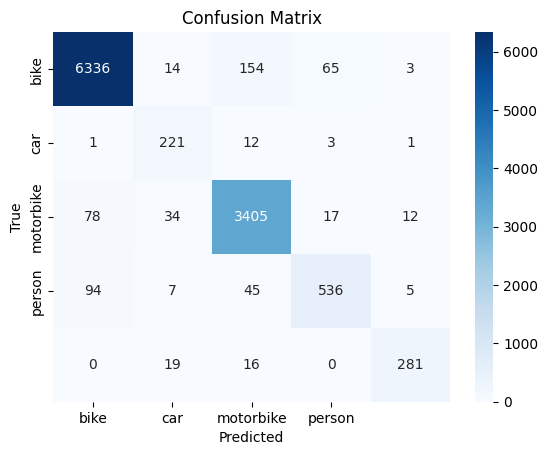

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Định nghĩa tên các lớp (class)
class_names = ['bike', 'car', 'motorbike', 'person']  # Thay đổi theo dataset của bạn

# Tính confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Vẽ heatmap cho confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

# Cài đặt nhãn trục và tiêu đề
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Hiển thị đồ thị
plt.show()


In [ ]:
import torch
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
loss = criterion(outputs, labels)
print(f"Loss: {loss.item()}")


Loss: 0.08837632089853287
